In [10]:
import torch
import pandas as pd
import re
import numpy as npy
import os
from sklearn.metrics import accuracy_score, roc_auc_score
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib
import hdbscan

In [11]:
# change working directory
os.chdir('/athena/marchionnilab/scratch/lab_data/Mohamed/pca_outcome')

In [30]:
#os.environ["CUDA_VISIBLE_DEVICES"]='0,1'

In [6]:
#torch.cuda.empty_cache()

In [8]:
#!pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7410 sha256=2258818f5b17af0fafcd8f40561ce0aa892dbfe59d8f3381f3540c7f3a959b14
  Stored in directory: /scratch/mao4005_8579517/pip-ephem-wheel-cache-ph5qm6jy/wheels/ba/03/bb/7a97840eb54479b328672e15a536e49dc60da200fb21564d53
Successfully built GPUtil


In [16]:
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()   

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  4% |
|  1 |  0% |  4% |
|  2 |  0% |  0% |
|  3 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
|  1 |  0% |  0% |
|  2 |  0% |  0% |
|  3 |  0% |  0% |


In [19]:
gpu_usage()

| ID | GPU | MEM  |
-------------------
|  0 |  0% |   1% |
|  1 |  0% | 100% |
|  2 |  0% |   0% |
|  3 |  0% |   0% |


In [18]:
# 2.5x attention16
df_dir = '/athena/marchionnilab/scratch/lab_data/Mohamed/pca_outcome/objs/karen/model_pten/pten_10x_att_A32_patch200/'
df = torch.load(os.path.join(df_dir + 'patchpredictionloss.pkl'), map_location=torch.device('cuda:0'))
# pred_list = []
# label_list = []
# for i in range(len(df)):
#     slide_label = df['y_true'][i]
#     patch_confidence = df['patch_pred'][i]
    
#     # auc 
#     label_list += [slide_label for i in range(len(patch_confidence))]
#     pred_list += patch_confidence

# acc = accuracy_score(label_list, np.round(pred_list))
# auc = roc_auc_score(label_list, pred_list)
# print('patch level acc is: ', acc)
# print('patch level auc is: ', auc)

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 1; 31.72 GiB total capacity; 29.77 GiB already allocated; 19.56 MiB free; 30.35 GiB reserved in total by PyTorch)

In [33]:
# 2.5x average
df_dir = '/share/sablab/nfs03/data/TCGA_Brain/Results/TCGA2.5Classifier/2021-04-29 21:28:19'
df = pd.read_pickle(os.path.join(df_dir + '/patchpredictionlossnyppatch.pkl'))
pred_list = []
label_list = []
for i in range(len(df)):
    slide_label = df['y_true'][i]
    patch_confidence = df['patch_pred'][i]
    
    # auc 
    label_list += [slide_label for i in range(len(patch_confidence))]
    pred_list += patch_confidence

acc = accuracy_score(label_list, np.round(pred_list))
auc = roc_auc_score(label_list, pred_list)
print('patch level acc is: ', acc)
print('patch level auc is: ', auc)

patch level acc is:  0.6195097432725023
patch level auc is:  0.6734758968461771


In [35]:
# 10x attention16
df_dir = '/share/sablab/nfs03/data/TCGA_Brain/Results/TCGA10Attention/2021-04-28 15:08:35'
df = pd.read_pickle(os.path.join(df_dir + '/patchpredictionlossnyppatch.pkl'))
pred_list = []
label_list = []
for i in range(len(df)):
    slide_label = df['y_true'][i]
    patch_confidence = df['patch_pred'][i]
    
    # auc 
    label_list += [slide_label for i in range(len(patch_confidence))]
    pred_list += patch_confidence

acc = accuracy_score(label_list, np.round(pred_list))
auc = roc_auc_score(label_list, pred_list)
print('patch level acc is: ', acc)
print('patch level auc is: ', auc)

FileNotFoundError: [Errno 2] No such file or directory: '/share/sablab/nfs03/data/TCGA_Brain/Results/TCGA10Attention/2021-04-28 15:08:35/patchpredictionlossnyppatch.pkl'

### TSNE plot

In [6]:
df = pd.read_pickle('patchpredictionaccNYP_test_0818_with_embed.pkl')

In [131]:
#df_dir = './idh_nyp_labels.csv'
#df_tumor_labels = np.array(pd.read_csv(df_dir)['TUMOR_CLASS'])
#tumor_label_map = {'IA_IDH_MUTANT':1, 'IA_IDH_WT':0, 'OLIGO':2}
#for i in range(len(df_tumor_labels)):
#    df_tumor_labels[i] = tumor_label_map[df_tumor_labels[i]]
#df_tumor_labels = np.repeat(df_tumor_labels, 5)

In [9]:
embed_list = df['embed_list']
embed_data = []
for embed in embed_list:
    embed_data += embed[:5]
        
for i in range(len(embed_data)):
    embed_data[i] = embed_data[i].flatten()
    
embed_data = np.array(embed_data)    

In [20]:
label_data = []
label_list = df['y_true']
for label in label_list: 
    label_data += [int(label)]*5

In [21]:
slide_pred_data = []
slide_pred_list = df['y_pred']
for slide_pred in slide_pred_list: 
    slide_pred_data += [slide_pred]*5

In [22]:
pred_list = df['patch_pred']
pred_data = []
for pred in pred_list:
    pred_data += pred[:5]
    
pred_data = np.array(pred_data)  

In [26]:
# get umap embed
reducer = umap.UMAP() #n_components=2, n_neighbors=40, min_dist=0.4
embed_data = StandardScaler().fit_transform(embed_data)
embedding = reducer.fit_transform(embed_data)

(0.4589512348175049, 8.467442035675049, 7.712340831756592, 1.2038166522979736)

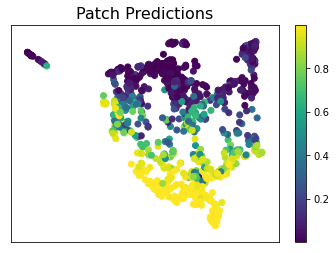

In [37]:
#explore parameters
embedding = clusterable_embedding = umap.UMAP(
    n_neighbors=10,
    min_dist=0.0,
    n_components=3,
).fit_transform(embed_data)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=pred_data)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('Patch Predictions', fontsize=16)
plt.axis([min(embedding[:, 0])-0.5,max(embedding[:, 0])+0.5, max(embedding[:, 1])+0.5,min(embedding[:, 1])-0.5])


In [41]:
clusteredlabels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=5,
).fit_predict(clusterable_embedding)

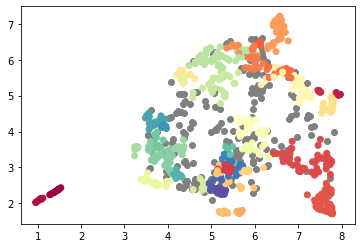

In [48]:
clustered = (clusteredlabels >= 0)
plt.scatter(embedding[~clustered, 0],
            embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            )
plt.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=clusteredlabels[clustered],
            
            cmap='Spectral');

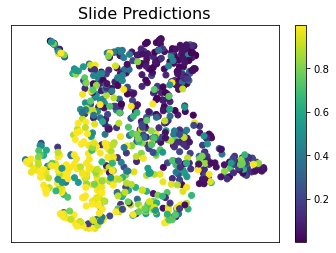

In [27]:
# color with slide pred
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=slide_pred_data)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('Slide Predictions', fontsize=16)
plt.axis([min(embedding[:, 0])-0.5,max(embedding[:, 0])+0.5, max(embedding[:, 1])+0.5,min(embedding[:, 1])-0.5])
plt.savefig('umap_slide_pred.png')

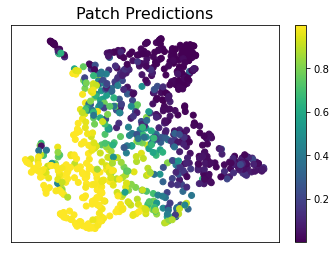

In [28]:
# color with patch pred
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=pred_data)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('Patch Predictions', fontsize=16)
plt.axis([min(embedding[:, 0])-0.5,max(embedding[:, 0])+0.5, max(embedding[:, 1])+0.5,min(embedding[:, 1])-0.5])
plt.savefig('umap_patch_pred.png')

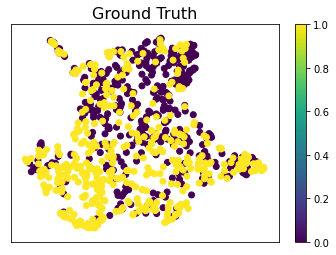

In [29]:
# color with patch pred
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=label_data)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('Ground Truth', fontsize=16)
plt.axis([min(embedding[:, 0])-0.5,max(embedding[:, 0])+0.5, max(embedding[:, 1])+0.5,min(embedding[:, 1])-0.5])
plt.savefig('umap_slide_label.png')

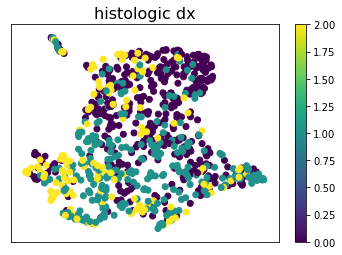

In [146]:
# color with tumor type 
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=df_tumor_labels)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('histologic dx', fontsize=16)
plt.axis([min(embedding[:, 0])-0.5,max(embedding[:, 0])+0.5, max(embedding[:, 1])+0.5,min(embedding[:, 1])-0.5])
plt.savefig('umap_tumor_type.png')

### draw image

In [147]:
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [148]:
patch_list = df['patch_name']
patch_data = []
for patch in patch_list:
    patch_data += patch[:5]
    
images = patch_data

for i in range(len(images)):
    images[i] = images[i][0]

In [149]:
tx, ty = embedding[:,0], embedding[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

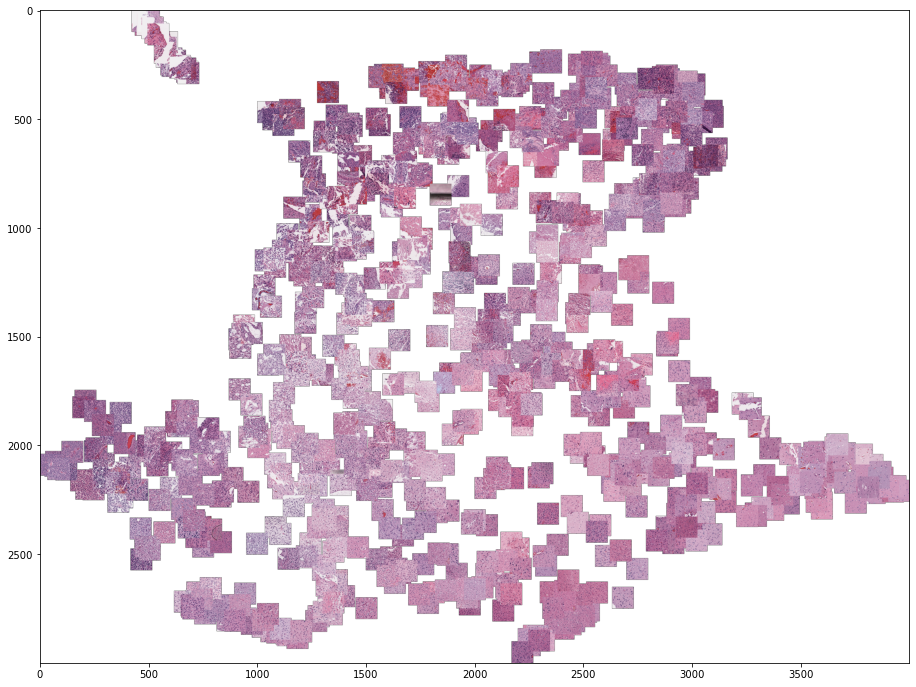

In [150]:
width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.load(img))
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [151]:
full_image.save("./image_tsne.png")

### confident samples 

In [114]:
pred_list = df['patch_pred']
pred_data = []
embed_list = df['embed_list']
embed_data = []
patch_list = df['patch_name']
patch_data = []

for i in range(len(pred_list)):
    zipped = list(zip(pred_list[i], embed_list[i], patch_list[i]))
    sorted_pair = sorted(zipped, key = lambda x: x[0])
    if slide_pred_list[i] < 0.5:
        sorted_pair = sorted_pair[:5]
    else:
        sorted_pair = sorted_pair[-5:]
        
    for pred, embed, patch in sorted_pair:
        pred_data.append(pred)
        embed_data.append(embed.flatten())   
        patch_data.append(patch[0])  
    
pred_data = np.array(pred_data)
embed_data = np.array(embed_data)
images = patch_data

In [115]:
# get umap embed
reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.4)
embed_data = StandardScaler().fit_transform(embed_data)
embedding = reducer.fit_transform(embed_data)

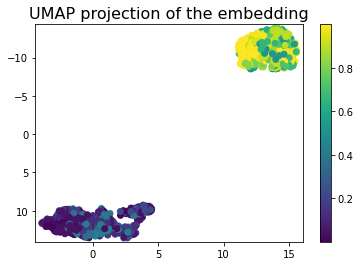

In [116]:
# color with slide pred
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=slide_pred_data)
plt.colorbar()
plt.title('UMAP projection of the embedding', fontsize=16)
plt.axis([min(embedding[:, 0])-0.5,max(embedding[:, 0])+0.5, max(embedding[:, 1])+0.5,min(embedding[:, 1])-0.5])
plt.savefig('umap_confident_samples_slide_pred.png')

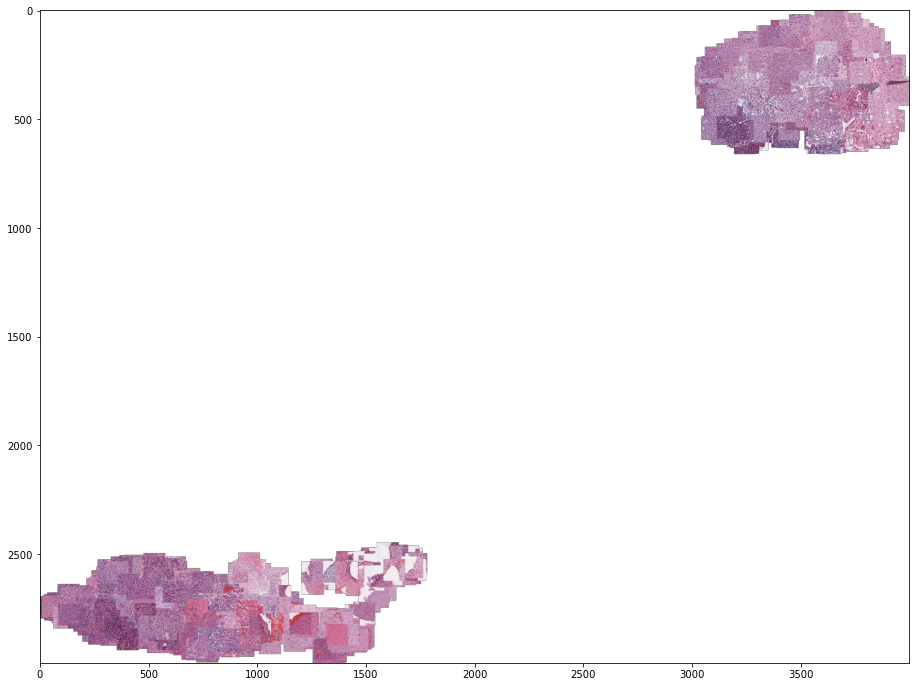

In [117]:
width = 4000
height = 3000
max_dim = 100

tx, ty = embedding[:,0], embedding[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.load(img))
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [118]:
full_image.save("./image_umap_confident.png")

### IDH mut only

In [119]:
mut_df = df[df['y_true'] == 1]

In [120]:
pred_list = list(mut_df['patch_pred'])
pred_data = []
embed_list = list(mut_df['embed_list'])
embed_data = []
patch_list = list(mut_df['patch_name'])
patch_data = []

for i in range(len(pred_list)):
    zipped = list(zip(pred_list[i], embed_list[i], patch_list[i]))
    for pred, embed, patch in zipped[:5]:
        pred_data.append(pred)
        embed_data.append(embed.flatten())   
        patch_data.append(patch[0])  
    
pred_data = np.array(pred_data)
embed_data = np.array(embed_data)
images = patch_data

In [121]:
# get umap embed
reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.4)
embed_data = StandardScaler().fit_transform(embed_data)
embedding = reducer.fit_transform(embed_data)

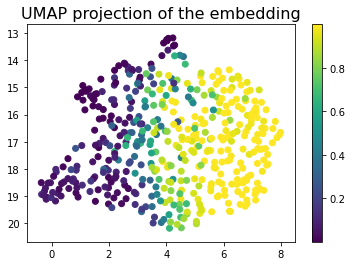

In [122]:
# color with slide pred
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=pred_data)
plt.colorbar()
plt.title('UMAP projection of the embedding', fontsize=16)
plt.axis([min(embedding[:, 0])-0.5,max(embedding[:, 0])+0.5, max(embedding[:, 1])+0.5,min(embedding[:, 1])-0.5])
plt.savefig('umap_idh_mut.png')

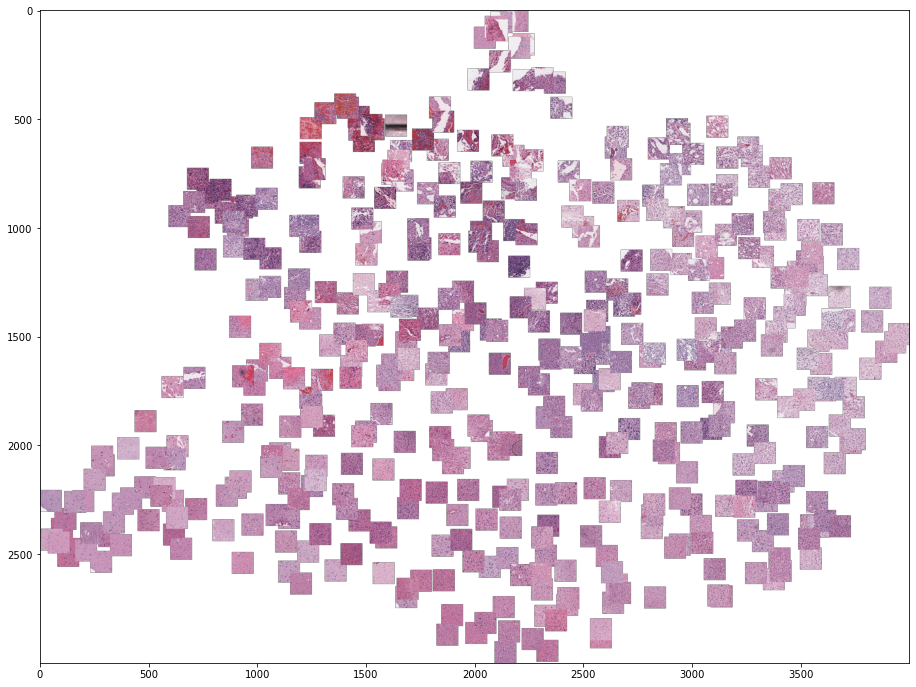

In [123]:
width = 4000
height = 3000
max_dim = 100

tx, ty = embedding[:,0], embedding[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.load(img))
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [124]:
full_image.save("./image_umap_idh_mut.png")

### IDH WT only

In [125]:
wt_df = df[df['y_true'] == 0]

In [126]:
pred_list = list(wt_df['patch_pred'])
pred_data = []
embed_list = list(wt_df['embed_list'])
embed_data = []
patch_list = list(wt_df['patch_name'])
patch_data = []

for i in range(len(pred_list)):
    zipped = list(zip(pred_list[i], embed_list[i], patch_list[i]))
    for pred, embed, patch in zipped[:5]:
        pred_data.append(pred)
        embed_data.append(embed.flatten())   
        patch_data.append(patch[0])  
    
pred_data = np.array(pred_data)
embed_data = np.array(embed_data)
images = patch_data

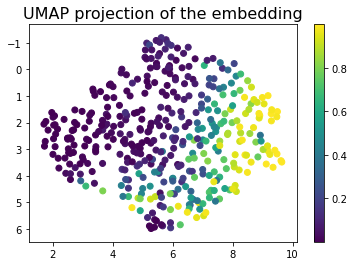

In [127]:
# get umap embed
reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.4)
embed_data = StandardScaler().fit_transform(embed_data)
embedding = reducer.fit_transform(embed_data)

# color with slide pred
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=pred_data)
plt.colorbar()
plt.title('UMAP projection of the embedding', fontsize=16)
plt.axis([min(embedding[:, 0])-0.5,max(embedding[:, 0])+0.5, max(embedding[:, 1])+0.5,min(embedding[:, 1])-0.5])
plt.savefig('umap_idh_wt.png')

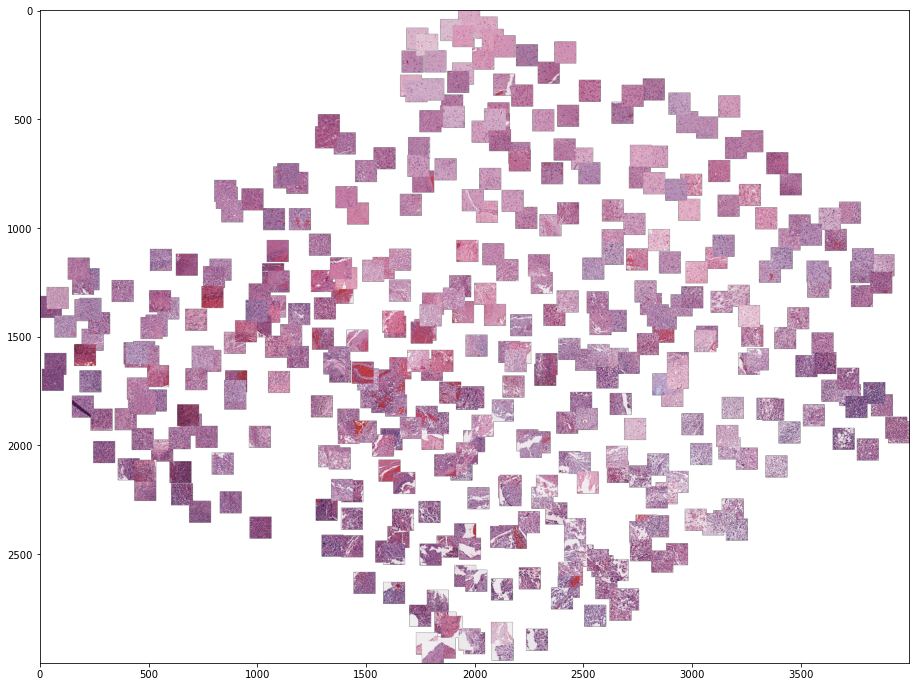

In [128]:
width = 4000
height = 3000
max_dim = 100

tx, ty = embedding[:,0], embedding[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.load(img))
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [129]:
full_image.save("./image_umap_idh_wt.png")

### calibration

In [118]:
def calibration_curve(sigmoid, labels, num_bins = 10):
    zero_prob = np.expand_dims(np.array(1.-sigmoid), axis=1)
    one_prob = np.expand_dims(np.array(sigmoid), axis=1)
    softmax = np.concatenate((zero_prob, one_prob), axis=1)
    predictions = np.argmax(softmax, axis=1)
    confidences = np.max(softmax, axis=1)
    labels = np.array(labels)
    
    step = (confidences.shape[0] + num_bins - 1) // num_bins
    bins = np.sort(confidences)[::step]
    if confidences.shape[0] % step != 1:
        bins = np.concatenate((bins, [np.max(confidences)]))
    #bins = np.linspace(0.1, 1.0, 30)

    bin_lowers = bins[:-1]
    bin_uppers = bins[1:]

    accuracies = (predictions == labels)

    xs = []
    ys = []
    zs = []

    ece = 0.0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        # Calculated |confidence - accuracy| in each bin
        in_bin = (confidences >= bin_lower) * (confidences < bin_upper)
        prop_in_bin = in_bin.astype('float').mean()
        if prop_in_bin > 0:
            accuracy_in_bin = accuracies[in_bin].mean()
            avg_confidence_in_bin = confidences[in_bin].mean()
            ece += np.abs(avg_confidence_in_bin-accuracy_in_bin) * prop_in_bin
            xs.append(avg_confidence_in_bin)
            ys.append(accuracy_in_bin)
            zs.append(prop_in_bin)
    
    ### accounts for the case when bin = [1, 1]
    if bin_lower == bin_upper:
        in_bin = (confidences == bin_lower)
        prop_in_bin = in_bin.astype('float').mean()
        if prop_in_bin > 0:
            accuracy_in_bin = accuracies[in_bin].mean()
            avg_confidence_in_bin = confidences[in_bin].mean()
            ece += np.abs(avg_confidence_in_bin-accuracy_in_bin) * prop_in_bin
            xs.append(avg_confidence_in_bin)
            ys.append(accuracy_in_bin)
            zs.append(prop_in_bin)
    
    xs = np.array(xs)
    ys = np.array(ys)
    zs = np.array(zs)
    
    print('ECE = ' + str(ece))
    print('ACC = ' + str(accuracies.sum()/len(accuracies)))
    
    return xs, ys, zs

### tcga

In [135]:
df_dir = './slide_prediction_tcga.csv'
df = pd.read_csv(df_dir)

df_dir = './slide_predictions_nypall.csv'
df_nyp = pd.read_csv(df_dir)

df_dir = '/share/sablab/nfs03/data/TCGA_Brain/Results/TCGA10Attention/2021-04-28 14:41:37/'
df_nyp_label = pd.read_pickle(os.path.join(df_dir + '/patchpredictionaccNYP_test_0818_with_embed.pkl'))
labels_nyp = np.array(df_nyp_label['y_true'])

In [136]:
labels = df['y_true']
preds = df['X0_10x']
age_preds = df['age_rep1_10']
ensemble_preds = df['ensemble_pred_10x']

In [137]:
preds_nyp = df_nyp['X0_10x']
age_preds_nyp = df_nyp['age_rep1_10']
ensemble_preds_nyp = df_nyp['ensemble_pred_10x']

In [138]:
xs0, ys0, zs0 = calibration_curve(preds, labels, num_bins = 10)
xs1, ys1, zs1 = calibration_curve(age_preds, labels, num_bins = 10)
xs2, ys2, zs2 = calibration_curve(ensemble_preds, labels, num_bins = 10)
xs3, ys3, zs3 = calibration_curve(preds_nyp, labels_nyp, num_bins = 10)
xs4, ys4, zs4 = calibration_curve(age_preds_nyp, labels_nyp, num_bins = 10)
xs5, ys5, zs5 = calibration_curve(ensemble_preds_nyp, labels_nyp, num_bins = 10)

ECE = 0.06903054573146312
ACC = 0.95
ECE = 0.041771870204684064
ACC = 0.9666666666666667
ECE = 0.06347307131452352
ACC = 0.9666666666666667
ECE = 0.11143467568965525
ACC = 0.7701149425287356
ECE = 0.1206807457464252
ACC = 0.7758620689655172
ECE = 0.10852057772988503
ACC = 0.764367816091954


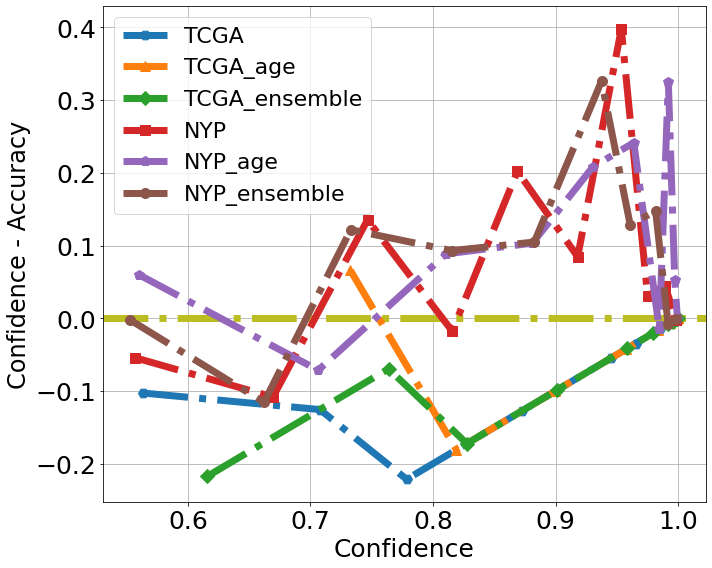

In [143]:
cmap = matplotlib.cm.get_cmap('tab10')

plt.figure(figsize=(10,8))
plt.axhline(y=0,linestyle='-.', color = cmap.colors[8], linewidth=7)

plt.plot(xs0, xs0 - ys0, '-.H', label = 'TCGA', color = cmap.colors[0], markersize=10, linewidth=7)
plt.plot(xs1, xs1 - ys1, '-.^', label = 'TCGA_age', color = cmap.colors[1], markersize=10, linewidth=7)
plt.plot(xs2, xs2 - ys2, '-.D', label = 'TCGA_ensemble', color = cmap.colors[2], markersize=10, linewidth=7)
plt.plot(xs3, xs3 - ys3, '-.s', label = 'NYP', color = cmap.colors[3], markersize=10, linewidth=7)
plt.plot(xs4, xs4 - ys4, '-.p', label = 'NYP_age', color = cmap.colors[4], markersize=10, linewidth=7)
plt.plot(xs5, xs5 - ys5, '-.o', label = 'NYP_ensemble', color = cmap.colors[5], markersize=10, linewidth=7)

plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.legend(loc=0, fontsize = 22)
plt.xlabel('Confidence',fontsize = 25)
plt.ylabel('Confidence - Accuracy', fontsize = 24)
plt.grid()
plt.tight_layout()
plt.savefig('ece.pdf')

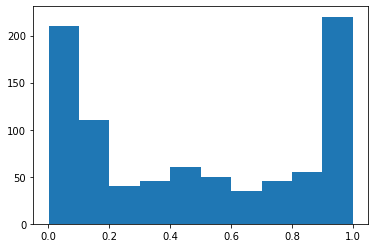

In [6]:
plt.hist(slide_pred_data)
plt.show() 